In [2]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [4]:
#Loading data
df=pd.read_csv("/content/drive/MyDrive/Myanmar weather forecast and traffic congestion reduction/open_meteo.csv")

In [5]:
#Displaying Some Random data
df.sample(5)

,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
37965,2019-09-24,61,31.6,24.3,26.9,39.1,29.4,33.0,2019-09-23T23:14,2019-09-24T11:20,...,2.0,8.3,29.9,50,4.47,12.400002,98.600006,8.0,Myanmar,Myeik
6091,2013-03-21,0,36.3,19.6,29.0,37.3,20.7,28.5,2013-03-20T23:38,2013-03-21T11:46,...,0.0,13.1,27.7,151,6.53,22.000000,96.100006,82.0,Myanmar,Mandalay
11653,2014-12-27,1,29.5,13.9,22.3,31.6,13.9,23.6,2014-12-27T00:08,2014-12-27T11:04,...,0.0,6.8,16.2,1,3.37,19.700005,96.100006,125.0,Myanmar,Nay Pyi Taw
46534,2016-04-09,1,31.6,20.0,25.9,31.4,20.1,25.9,2016-04-08T23:09,2016-04-09T11:43,...,0.0,13.0,52.2,287,5.22,23.800003,98.899994,988.0,Myanmar,Laukkaing
1582,2014-05-02,2,37.8,26.4,31.6,41.7,30.7,35.4,2014-05-01T23:09,2014-05-02T11:55,...,0.0,14.6,30.6,231,6.52,16.800003,96.200010,12.0,Myanmar,Yangoon


In [6]:
#Checking Number of Observation and Variable
df.shape

(49160, 24)

In [8]:
#Info About Variables and their Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49160 entries, 0 to 49159
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   time                        49160 non-null  object 
 1   weathercode                 49160 non-null  int64  
 2   temperature_2m_max          49160 non-null  float64
 3   temperature_2m_min          49160 non-null  float64
 4   temperature_2m_mean         49160 non-null  float64
 5   apparent_temperature_max    49160 non-null  float64
 6   apparent_temperature_min    49160 non-null  float64
 7   apparent_temperature_mean   49160 non-null  float64
 8   sunrise                     49160 non-null  object 
 9   sunset                      49160 non-null  object 
 10  shortwave_radiation_sum     49160 non-null  float64
 11  precipitation_sum           49160 non-null  float64
 12  rain_sum                    49160 non-null  float64
 13  snowfall_sum                491

In [9]:
df.isnull().sum()

time                          0
weathercode                   0
temperature_2m_max            0
temperature_2m_min            0
temperature_2m_mean           0
apparent_temperature_max      0
apparent_temperature_min      0
apparent_temperature_mean     0
sunrise                       0
sunset                        0
shortwave_radiation_sum       0
precipitation_sum             0
rain_sum                      0
snowfall_sum                  0
precipitation_hours           0
windspeed_10m_max             0
windgusts_10m_max             0
winddirection_10m_dominant    0
et0_fao_evapotranspiration    1
latitude                      0
longitude                     0
elevation                     0
country                       0
city                          0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
#summary statistics data
df.describe()

,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation
count,49160.000000,49160.000000,49160.000000,49160.000000,49160.000000,49160.000000,49160.000000,49160.000000,49160.000000,49160.000000,49160.0,49160.000000,49160.000000,49160.000000,49160.000000,49159.000000,49160.000000,49160.000000,49160.000000
mean,33.857059,29.542915,20.791481,24.853009,33.169434,23.647325,27.976263,17.550412,5.536859,5.536859,0.0,6.172539,10.976257,29.554048,202.271562,3.802507,19.480003,96.770004,351.400000
std,28.346242,4.057097,4.564320,3.794812,5.265635,6.500045,5.357638,5.265606,10.746810,10.746810,0.0,7.791999,4.635709,8.671707,88.633301,1.379380,3.109951,2.017967,486.853635
min,0.000000,5.100000,3.500000,4.700000,2.700000,1.100000,2.200000,1.200000,0.000000,0.000000,0.0,0.000000,2.300000,9.000000,0.000000,0.350000,12.400002,92.399994,6.000000
25%,1.000000,27.100000,17.800000,22.500000,30.100000,19.200000,24.200000,14.550000,0.000000,0.000000,0.0,0.000000,7.600000,23.000000,152.000000,2.930000,16.900002,96.100006,12.000000
50%,51.000000,29.600000,22.000000,25.600000,33.800000,25.400000,29.500000,18.000000,0.500000,0.500000,0.0,2.000000,10.200000,28.400000,199.000000,3.710000,20.500004,96.650008,83.000000
75%,61.000000,31.800000,24.400000,27.300000,37.000000,29.000000,32.000000,21.370000,6.900000,6.900000,0.0,11.000000,13.500000,34.900000,270.000000,4.650000,21.400002,98.600006,787.000000
max,65.000000,42.900000,30.700000,36.500000,46.300000,35.300000,38.800000,29.660000,193.100000,193.100000,0.0,24.000000,57.600000,116.300000,360.000000,10.070000,23.800003,99.700010,1407.000000


Outlier Detection

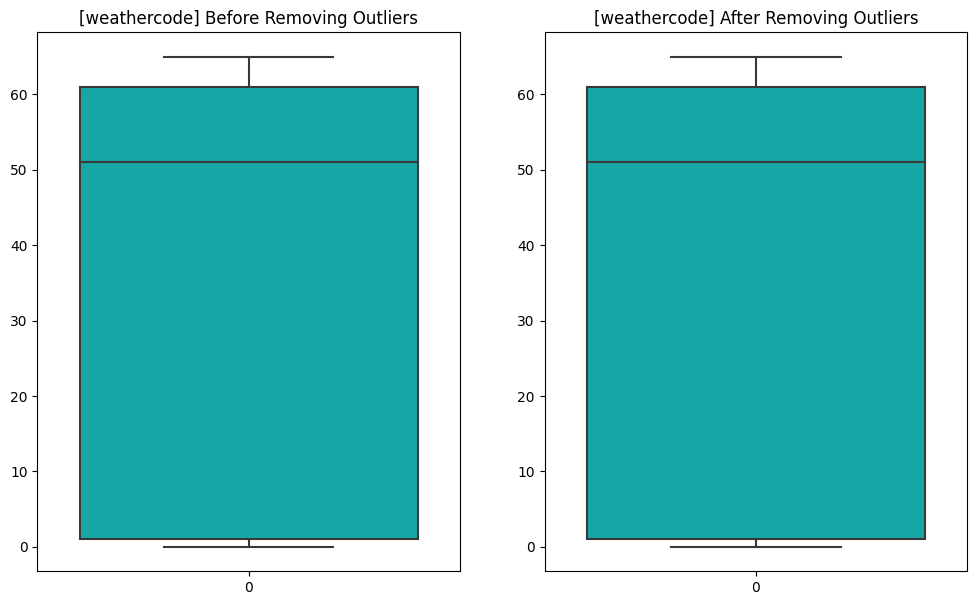

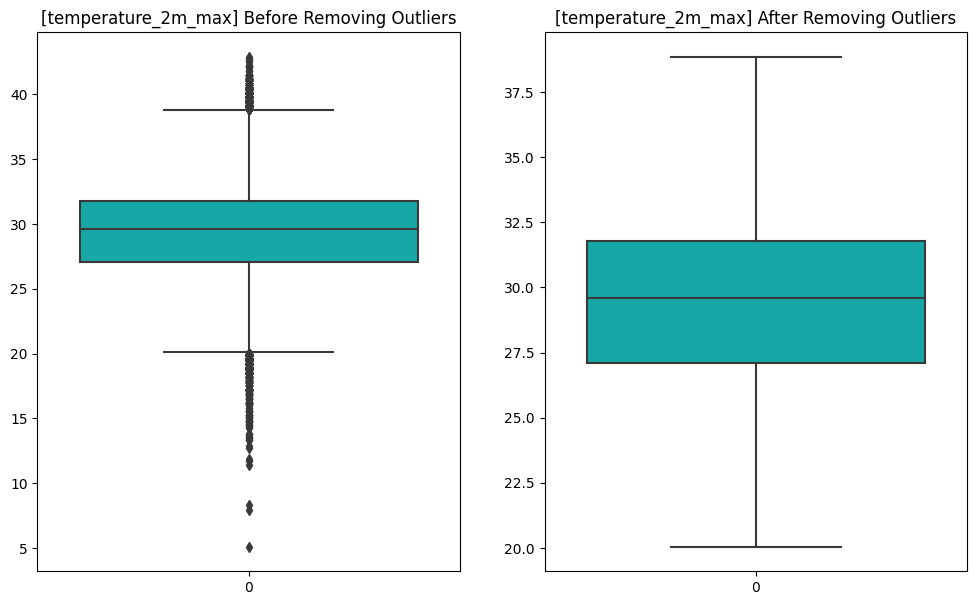

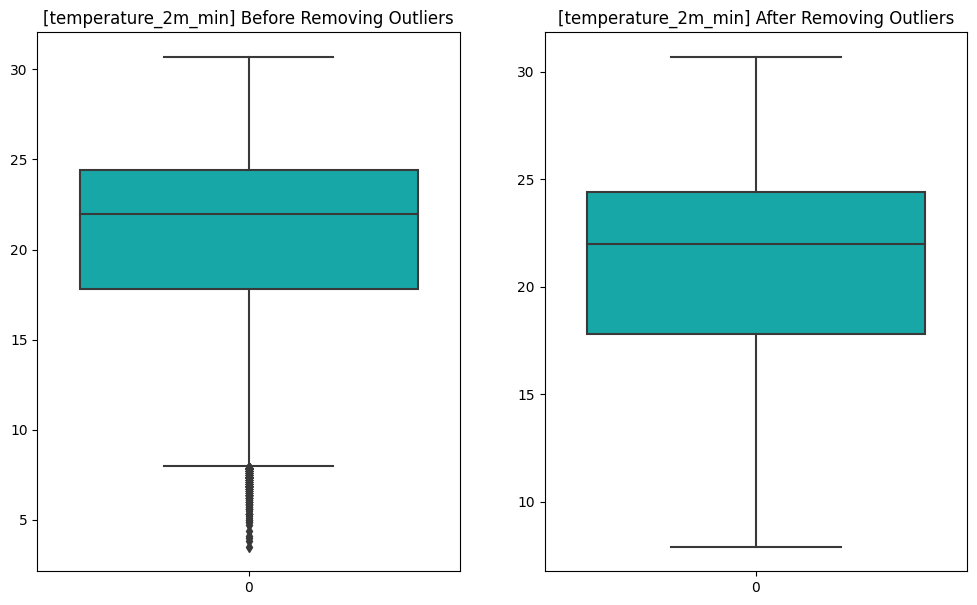

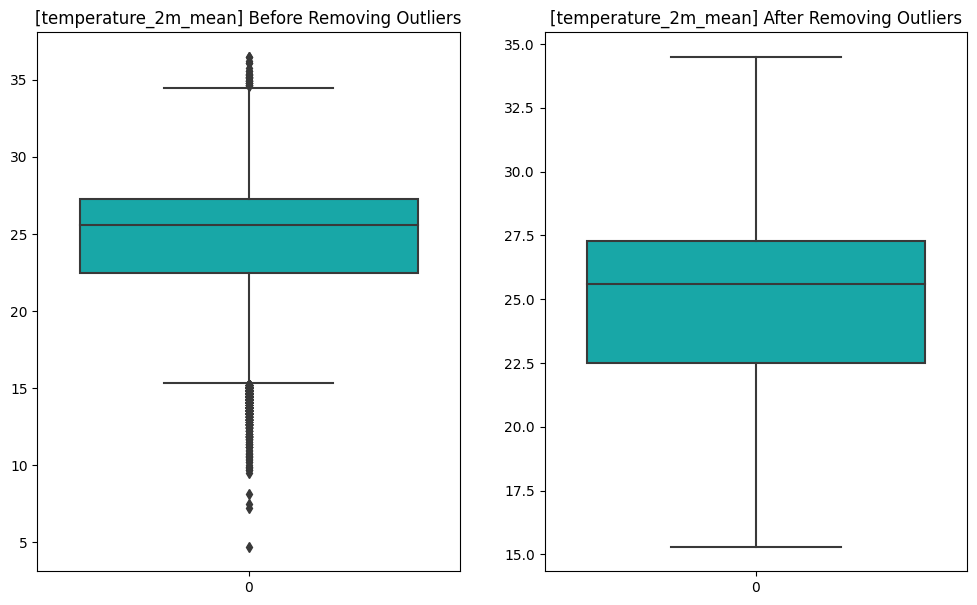

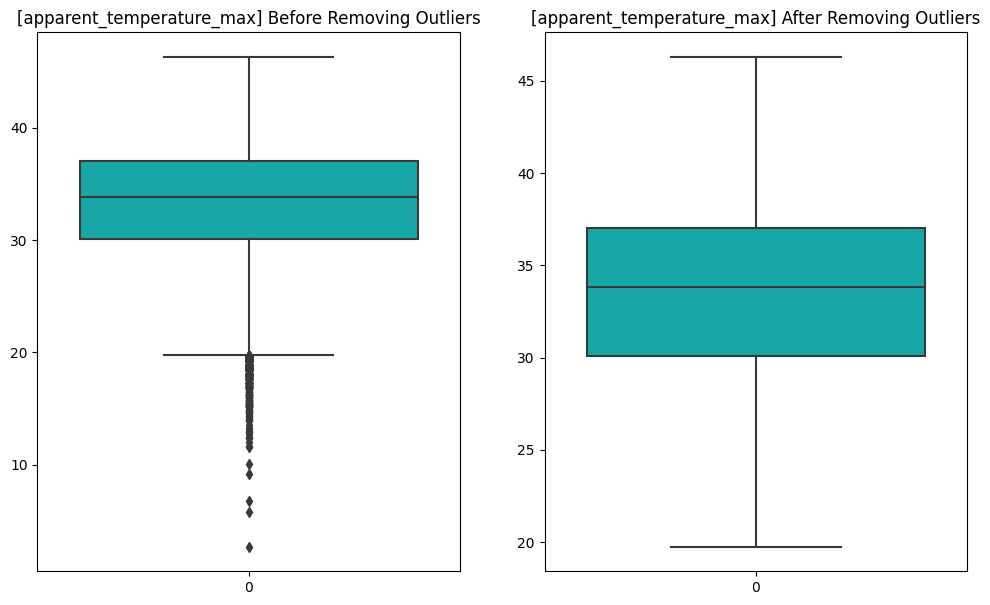

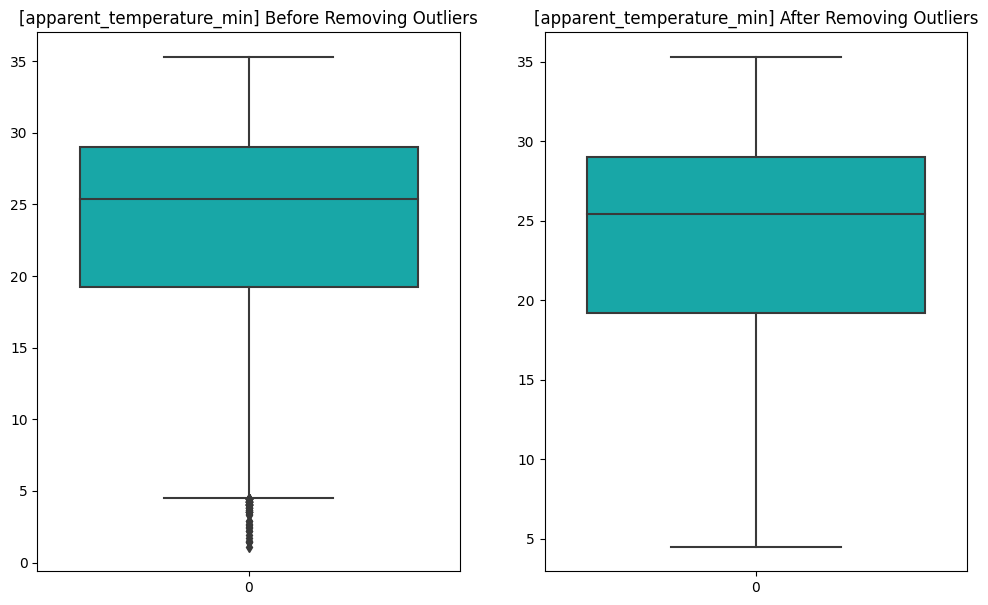

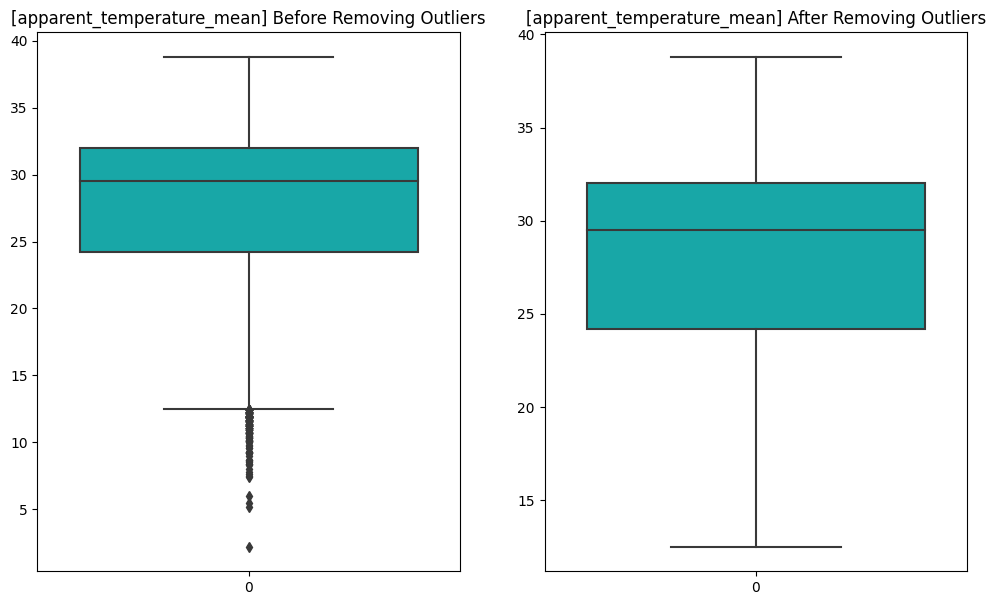

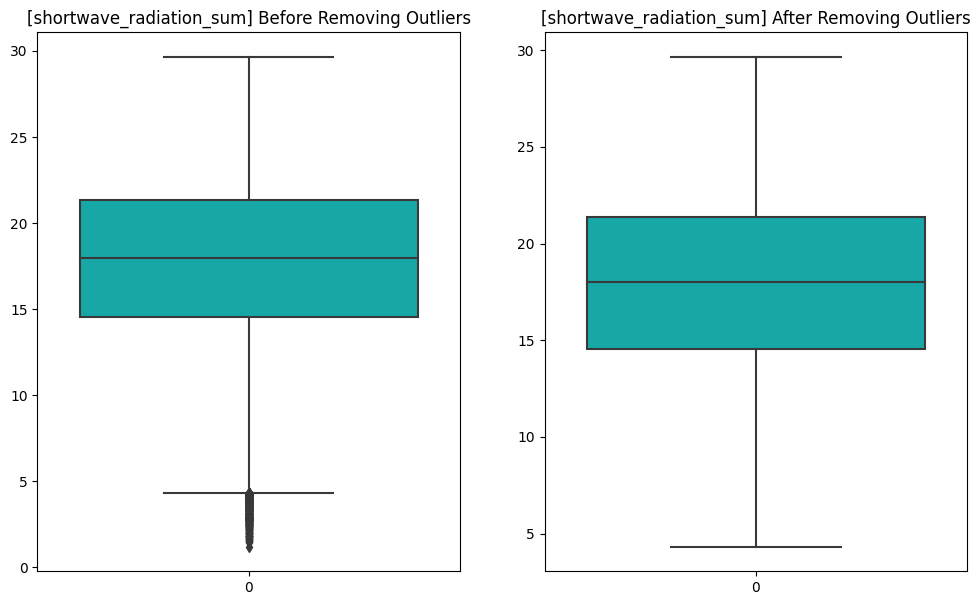

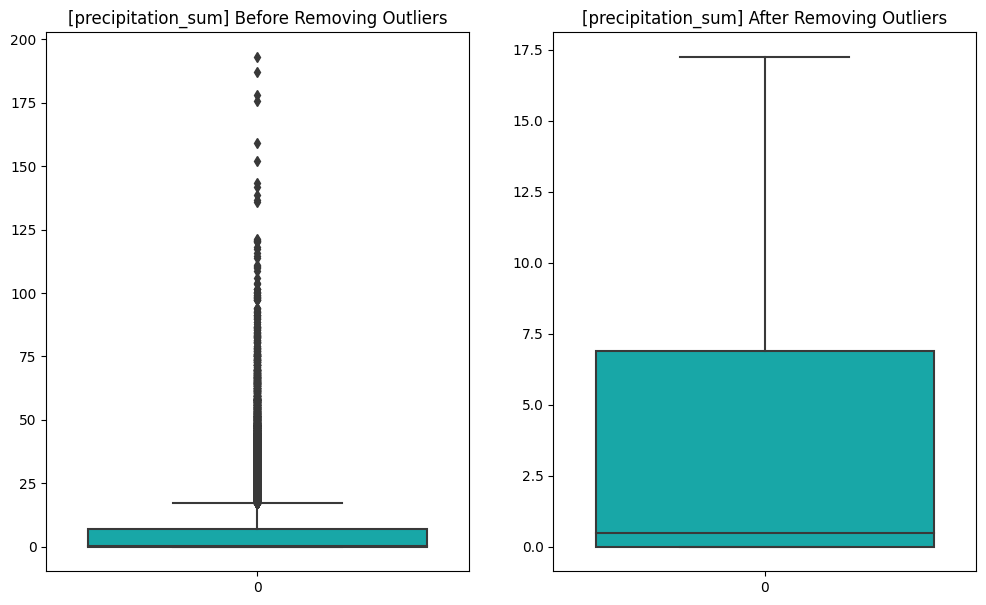

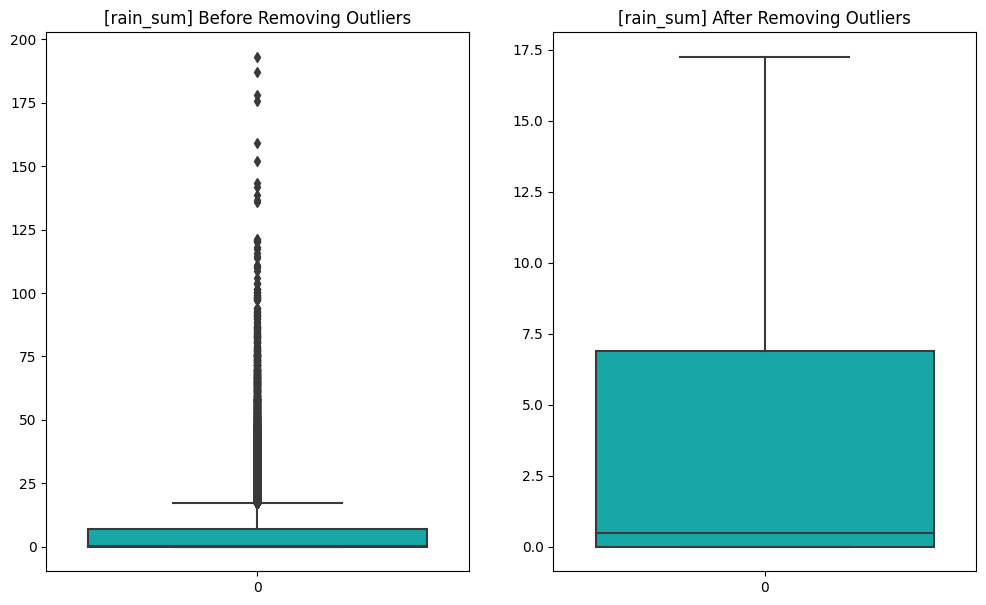

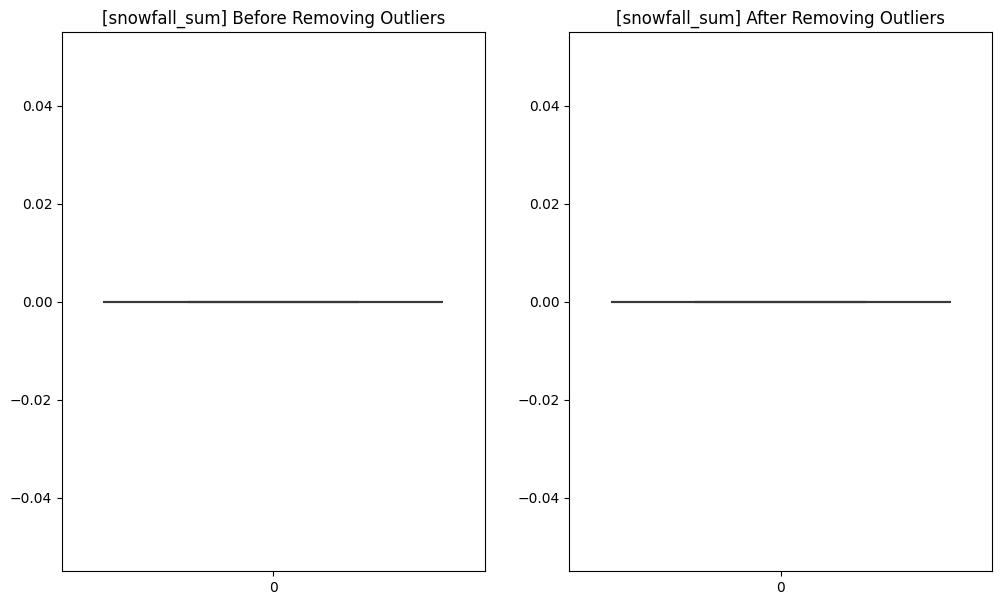

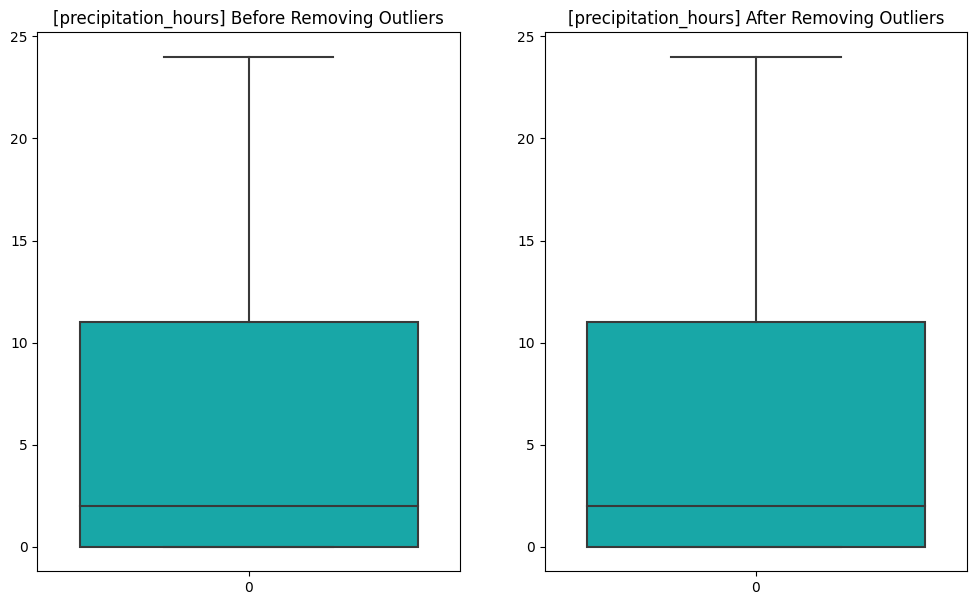

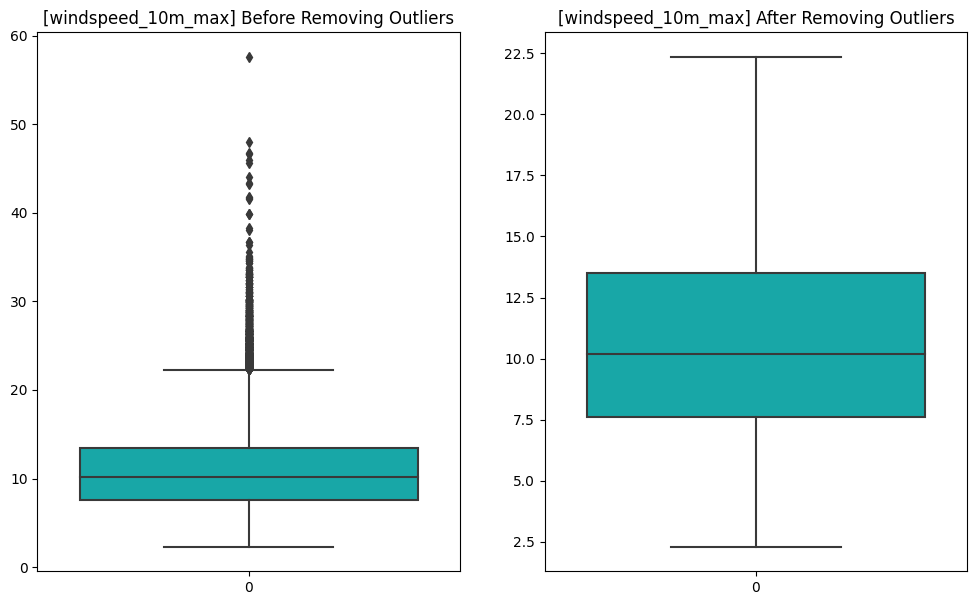

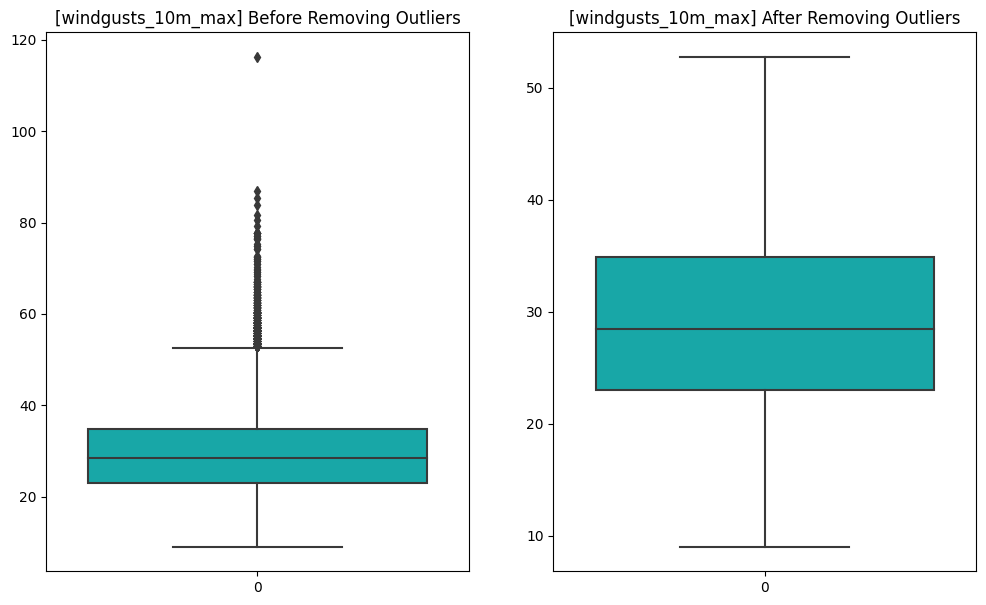

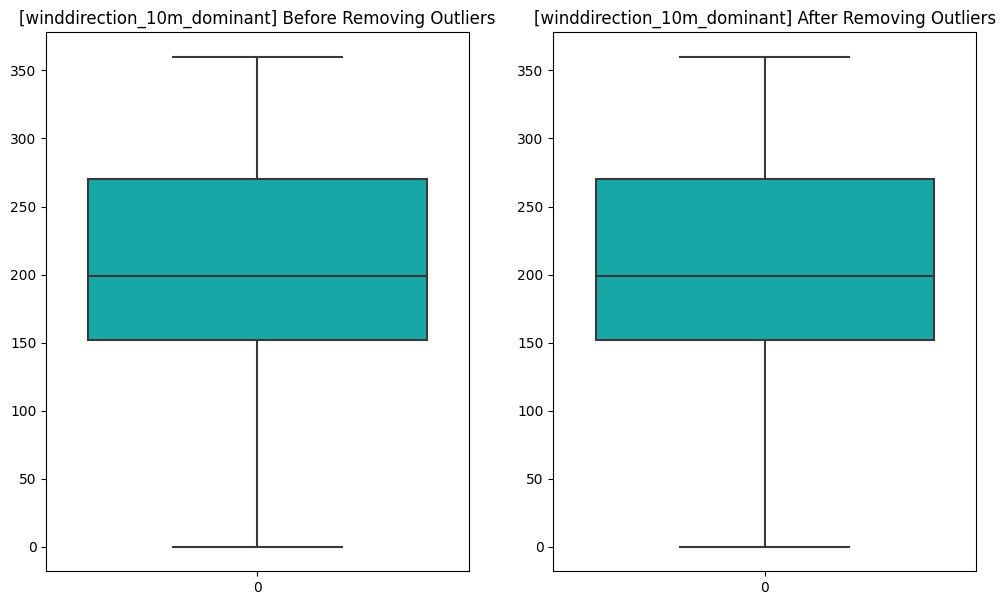

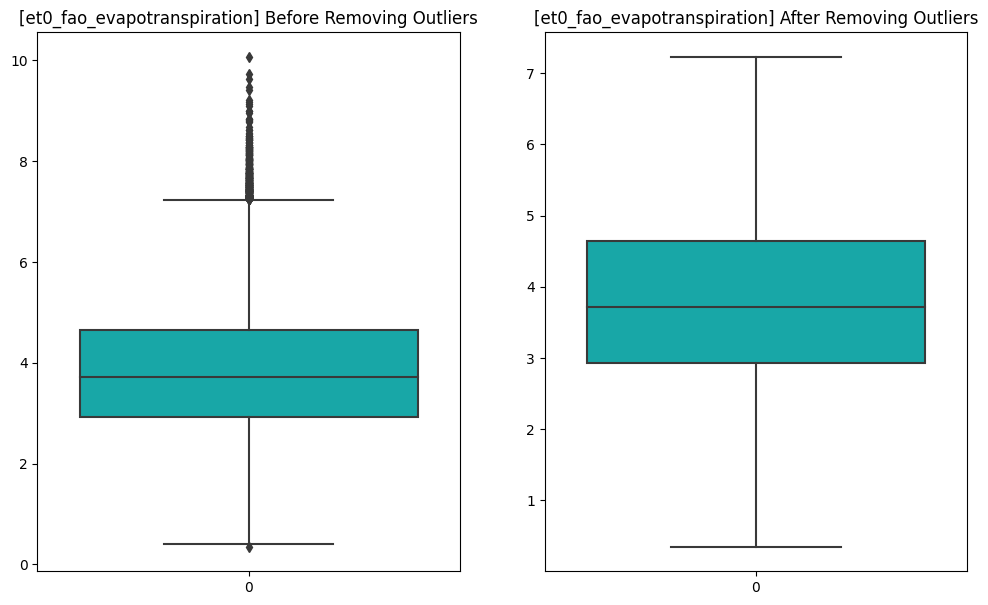

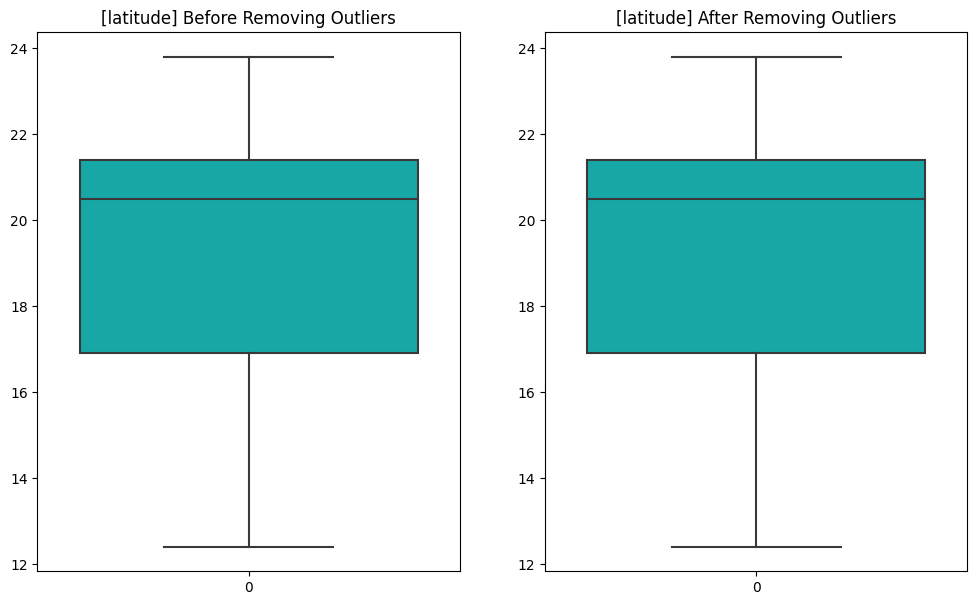

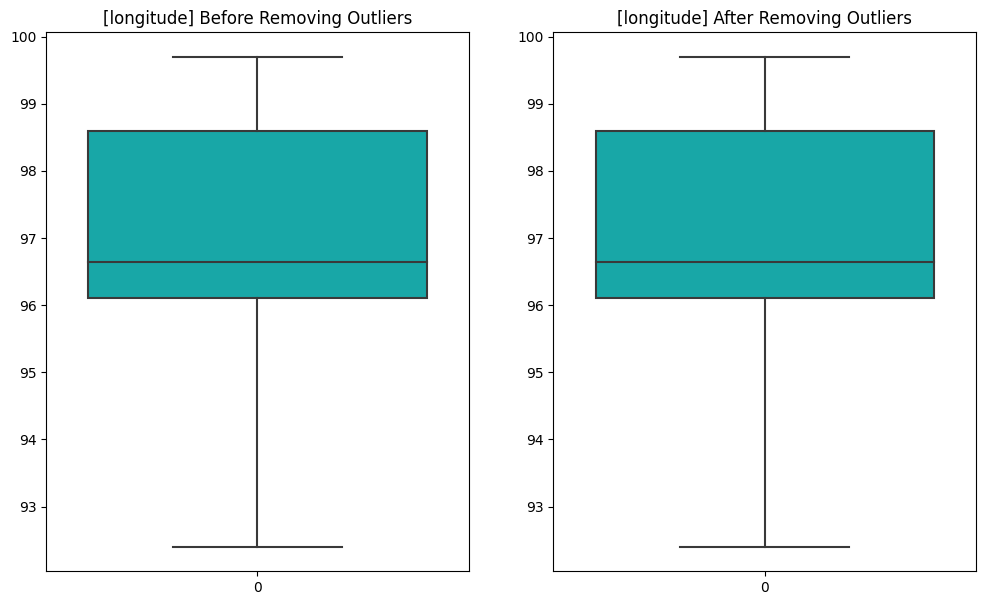

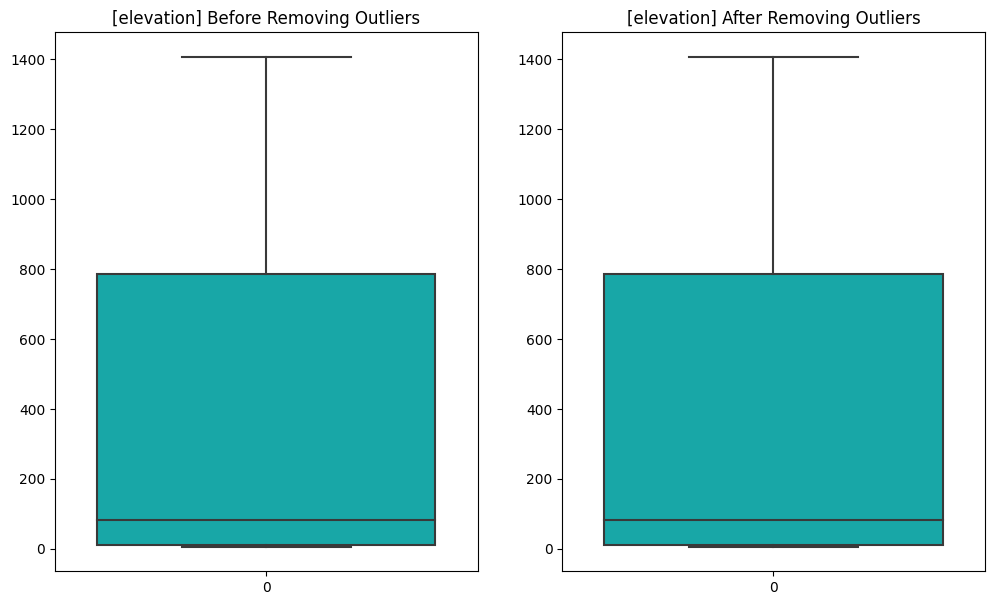

In [16]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
for col in newdf.columns:

  #BoxPlot before removing outliers
  fig, ax = plt.subplots(nrows= 1, ncols=2)
  fig.set_size_inches(12, 7)
  ax[0].set_title("[{}] Before Removing Outliers".format(str(col)))
  sns.boxplot(data=df[col],orient="v", color = 'c', ax=ax[0])

  #Removing Outliers
  Q1= df[col].quantile(0.25)
  Q3= df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-(1.5*IQR)
  upper_bound=Q3+(1.5*IQR)
  df[col]=np.where(df[col]>upper_bound,upper_bound,df[col])
  df[col]=np.where(df[col]<lower_bound,lower_bound,df[col])

  #BoxPlot After Removing Outliers
  ax[1].set_title("[{}] After Removing Outliers".format(str(col)))
  sns.boxplot(data=df[col],orient="v", color = 'c', ax=ax[1])
  plt.show()

Data Cleaning

In [17]:
df.columns

Index(['time', 'weathercode', 'temperature_2m_max', 'temperature_2m_min',
       'temperature_2m_mean', 'apparent_temperature_max',
       'apparent_temperature_min', 'apparent_temperature_mean', 'sunrise',
       'sunset', 'shortwave_radiation_sum', 'precipitation_sum', 'rain_sum',
       'snowfall_sum', 'precipitation_hours', 'windspeed_10m_max',
       'windgusts_10m_max', 'winddirection_10m_dominant',
       'et0_fao_evapotranspiration', 'latitude', 'longitude', 'elevation',
       'country', 'city'],
      dtype='object')

In [19]:
df['city'].unique()

array(['Yangoon', 'Mandalay', 'Nay Pyi Taw', 'Hpa-An', 'Maungdaw',
       'Taunggyi', 'Magway', 'Myeik', 'Keng Tung', 'Laukkaing'],
      dtype=object)

In [20]:
df['country'].unique()

array(['Myanmar'], dtype=object)

In [21]:
df['time'].unique()

array(['2010-01-01', '2010-01-02', '2010-01-03', ..., '2023-06-15',
       '2023-06-16', '2023-06-17'], dtype=object)

Data Encoding

In [22]:
#initialize Encoder
le=LabelEncoder()

In [23]:
# Transforming Categorical Variables
df['sunrise']= le.fit_transform(df['sunrise'])
df['sunset']= le.fit_transform(df['sunset'])
df['country']= le.fit_transform(df['country'])
df['city']= le.fit_transform(df['city'])


In [24]:
# Feature creation : Time-based features
df['year'] = pd.to_datetime(df['time']).dt.year
df['month'] = pd.to_datetime(df['time']).dt.month
df['day'] = pd.to_datetime(df['time']).dt.dayofweek

In [25]:
df.to_csv('Preprocessed.csv',index=False)